# Call Put Payoff

콜 옵션과 풋 옵션은 옵션 계약의 두 가지 주요 유형입니다. 이들 각각의 페이오프는 다음과 같이 설명할 수 있습니다:

1. **콜 옵션(Call Option)의 페이오프**  
콜 옵션은 주식, 외화, 상품 등과 같은 기초 자산을 사전에 정해진 가격(행사가)으로 사기 위한 권리를 부여합니다. 페이오프는 다음과 같이 계산됩니다:

    페이오프 = max(0, S_T - K)

    여기서 S_T는 만기 시점의 기초 자산 가격(stock price at expiration)이고, K는 행사가입니다. 이 공식은 만기시 자산 가격이 행사가보다 높을 경우에만 이익을 볼 수 있음을 나타냅니다. 자산 가격이 행사가보다 낮으면, 옵션을 실행하는 것은 손실을 초래하므로, 옵션을 실행하지 않고 손실을 0으로 유지합니다.
    

2. **풋 옵션(Put Option)의 페이오프** 
풋 옵션은 주식, 외화, 상품 등과 같은 기초 자산을 사전에 정해진 가격(행사가)으로 팔기 위한 권리를 부여합니다. 페이오프는 다음과 같이 계산됩니다:

    페이오프 = max(0, K - S_T)

    여기서 S_T는 만기 시점의 기초 자산 가격(stock price at expiration)이고, K는 행사가입니다. 이 공식은 만기시 자산 가격이 행사가보다 낮을 경우에만 이익을 볼 수 있음을 나타냅니다. 자산 가격이 행사가보다 높으면, 옵션을 실행하는 것은 손실을 초래하므로, 옵션을 실행하지 않고 손실을 0으로 유지합니다.

이러한 페이오프 구조는 옵션의 본질적인 특성을 나타냅니다. 옵션은 소유자에게 일정 가격으로 기초 자산을 사거나 팔 권리를 부여하므로, 시장 가격이 행사가보다 유리한 방향으로 움직일 경우에만 옵션을 실행하게 됩니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### payoff 계산 parameter 설명
1. `sT`: 만기일의 기초자산 가격

2. `strike_price`: 이는 옵션 계약에서 사전에 정해진 가격(행사가)을 의미합니다. 콜 옵션의 경우, 이 가격은 옵션 소유자가 기초자산을 구매할 수 있는 가격을 나타내고, 풋 옵션의 경우 이 가격은 기초자산을 팔 수 있는 가격을 나타냅니다.

3. `premium`: 옵션 계약을 구매하기 위해 지불한 가격입니다. 이 비용은 일반적으로 페이오프 계산에서 차감됩니다. 

4. `contracts`: 거래되는 옵션 계약의 수를 나타냅니다. 

5. `multiplier`: 옵션 계약의 크기를 결정하는 요소로, 하나의 옵션 계약이 커버하는 기초자산의 수를 나타냅니다. 

In [2]:
def long_call_payoff(sT, strike_price, premium, contracts=1, multiplier=1):
    """
    롱 콜 전략은 투자자가 콜 옵션을 구매.
    만기시 주가가 행사가보다 크면, 행사가에서 주가를 뺀 만큼의 이익을 얻습니다.
    그렇지 않으면 이익은 없습니다. 그리고 프리미엄만큼의 비용이 발생합니다.
    """
    pnl = np.where(sT > strike_price, sT - strike_price, 0) - premium
    return pnl * contracts * multiplier  # 계약수와 배수를 곱해 최종 손익 계산

def short_call_payoff(sT, strike_price, premium, contracts=1, multiplier=1):
    """
    숏 콜 전략은 투자자가 콜 옵션을 판매.
    만기시 주가가 행사가보다 크면, 행사가에서 주가를 뺀 만큼의 손실이 발생합니다.
    그렇지 않으면 손실은 없습니다. 그리고 프리미엄만큼의 수익이 발생합니다.
    """
    pnl = np.where(sT > strike_price, strike_price - sT, 0) + premium
    return pnl * contracts * multiplier 

def long_put_payoff(sT, strike_price, premium, contracts=1, multiplier=1):
    """
    롱 풋 전략은 투자자가 풋 옵션을 구매.
    만기시 주가가 행사가보다 작으면, 행사가에서 주가를 뺀 만큼의 이익을 얻습니다.
    그렇지 않으면 이익은 없습니다. 그리고 프리미엄만큼의 비용이 발생합니다.
    """
    pnl = np.where(sT < strike_price, strike_price - sT, 0) - premium
    return pnl * contracts * multiplier  

def short_put_payoff(sT, strike_price, premium, contracts=1, multiplier=1):
    """
    숏 풋 전략은 투자자가 풋 옵션을 판매.
    만기시 주가가 행사가보다 작으면, 주가에서 행사가를 뺀 만큼의 손실이 발생합니다.
    그렇지 않으면 손실은 없습니다. 그리고 프리미엄만큼의 수익이 발생합니다.
    """
    pnl = np.where(sT < strike_price, sT - strike_price, 0) + premium
    return pnl * contracts * multiplier  # 계약수와 배수를 곱해 최종 손익을 계산합니다.

def plot_spread(st, values, strike, ax, label, style):
    ax.spines['bottom'].set_position('zero')  # x축을 그래프 중앙에 위치시킵니다.
    ax.plot(st, values, label=label, linestyle=style, linewidth=3)  # 전략에 따른 손익을 그래프로 그립니다.
    ax.plot(strike, 0, 'ro')  # 행사가를 그래프에 표시합니다.
    ax.axvline(strike, linestyle='--')  # 행사가 위치에 점선을 그립니다.
    ax.legend(loc="best")  
    ax.grid(True)  
    ax.set_xlabel('stock price')  
    ax.set_ylabel('P & L') 

"롱 콜(Long Call)"과 "숏 콜(Short Call)"은 옵션 거래의 두 가지 기본 전략이며, 각각은 다음과 같은 특성을 가지고 있습니다:

1. **롱 콜(Long Call)**
   
롱 콜 전략은 투자자가 콜 옵션을 구매하는 것을 의미합니다. 콜 옵션을 구매하면 투자자는 기초 자산을 미리 정해진 행사가에 사 수 있는 권리를 얻습니다. 만기일에 기초 자산의 시장가가 행사가보다 높으면 투자자는 이 차액만큼의 이익을 얻을 수 있습니다. 투자자의 손실은 프리미엄으로 지불한 금액으로 제한되며, 이는 주식 가격이 행사가 이하로 떨어졌을 때 발생합니다. 이 전략은 주식 가격이 상승할 것으로 예상될 때 사용됩니다.

3. **숏 콜(Short Call)**
   
숏 콜 전략은 투자자가 콜 옵션을 판매하는 것을 의미합니다. 콜 옵션을 판매하면 투자자는 옵션 구매자에게 기초 자산을 미리 정해진 행사가에 팔아야 하는 의무를 지게 됩니다. 이런 경우, 만기일에 기초 자산의 시장가가 행사가보다 높으면 옵션 구매자는 옵션을 실행하여 이익을 얻을 수 있고, 이는 옵션 판매자에게 손실을 가져다줍니다. 이 전략의 최대 수익은 옵션 프리미엄으로 제한되며, 이는 주식 가격이 행사가 이하로 떨어졌을 때 얻을 수 있습니다. 이 전략은 주식 가격이 하락하거나 제자리에 머무를 것으로 예상될 때 사용됩니다.

즉, **롱 콜은 상승하는 시장에서 이익을 얻기 위한 전략**이고, **숏 콜은 하락하거나 변동성이 적은 시장에서 이익을 얻기 위한 전략**입니다. 

- 롱 콜 전략의 손실은 지불한 프리미엄으로 제한되지만, 숏 콜 전략은 기초 자산의 가격이 무한정 상승할 수 있다는 점을 고려하면 이론적으로 무한한 손실 위험이 있습니다.

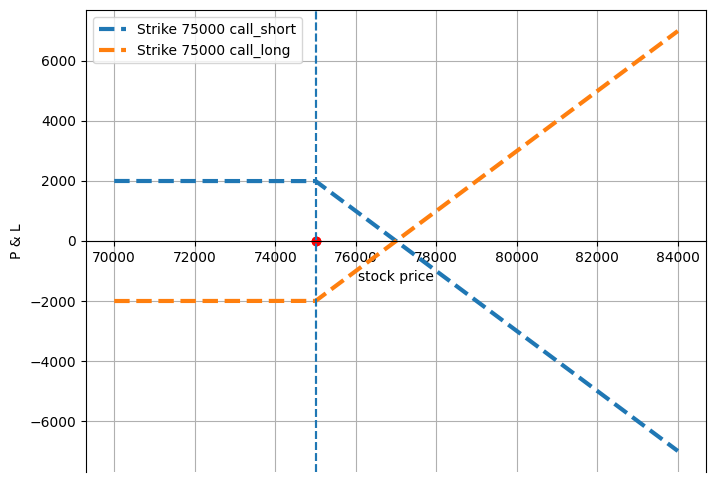

In [3]:
# 주식의 가격 범위를 설정합니다.
st = np.arange(70000, 84000, 1)
# 전체 페이오프를 계산하는 변수 초기화
total_payoff = np.zeros(st.shape)

fig, ax = plt.subplots(figsize=(8, 6))

# Short Call : 콜옵션 매도 
strike = 75000  # 행사가 설정
premium= 2000  # 프리미엄 설정

# 콜 옵션 매도의 페이오프 계산
payoff = short_call_payoff(st, strike, premium)
plot_spread(st, payoff, strike, ax, f'Strike {strike} call_short', '--')

# Long Call: 콜옵션 매수
strike = 75000 
premium= 2000

# 콜 옵션 매수의 페이오프 계산
payoff = long_call_payoff(st, strike, premium)
plot_spread(st, payoff, strike, ax, f'Strike {strike} call_long', '--')

"롱 풋(Long Put)"과 "숏 풋(Short Put)"은 옵션 거래의 두 가지 기본 전략이며, 각각은 다음과 같은 특성을 가지고 있습니다:

1. **롱 풋(Long Put)** 
롱 풋 전략은 투자자가 풋 옵션을 구매하는 것을 의미합니다. 풋 옵션을 구매하면 투자자는 기초 자산을 미리 정해진 행사가에 팔 수 있는 권리를 얻습니다. 만기일에 기초 자산의 시장가가 행사가보다 낮으면 투자자는 이 차액만큼의 이익을 얻을 수 있습니다. 투자자의 손실은 프리미엄으로 지불한 금액으로 제한되며, 이는 주식 가격이 행사가 이상으로 상승했을 때 발생합니다. 이 전략은 주식 가격이 하락할 것으로 예상될 때 사용됩니다.

2. **숏 풋(Short Put)** 
숏 풋 전략은 투자자가 풋 옵션을 판매하는 것을 의미합니다. 풋 옵션을 판매하면 투자자는 옵션 구매자에게 기초 자산을 미리 정해진 행사가에 사 야하는 의무를 지게 됩니다. 이런 경우, 만기일에 기초 자산의 시장가가 행사가보다 낮으면 옵션 구매자는 옵션을 실행하여 이익을 얻을 수 있고, 이는 옵션 판매자에게 손실을 가져다줍니다. 이 전략의 최대 수익은 옵션 프리미엄으로 제한되며, 이는 주식 가격이 행사가 이상으로 상승했을 때 얻을 수 있습니다. 이 전략은 주식 가격이 상승하거나 제자리에 머무를 것으로 예상될 때 사용됩니다.

즉, **롱 풋은 하락하는 시장에서 이익을 얻기 위한 전략**이고, **숏 풋은 상승하거나 변동성이 적은 시장에서 이익을 얻기 위한 전략**입니다. 

롱 풋 전략의 손실은 지불한 프리미엄으로 제한되지만, 숏 풋 전략은 기초 자산의 가격이 0까지만 떨어질 수 있다는 점을 고려하면 손실이 제한적입니다.

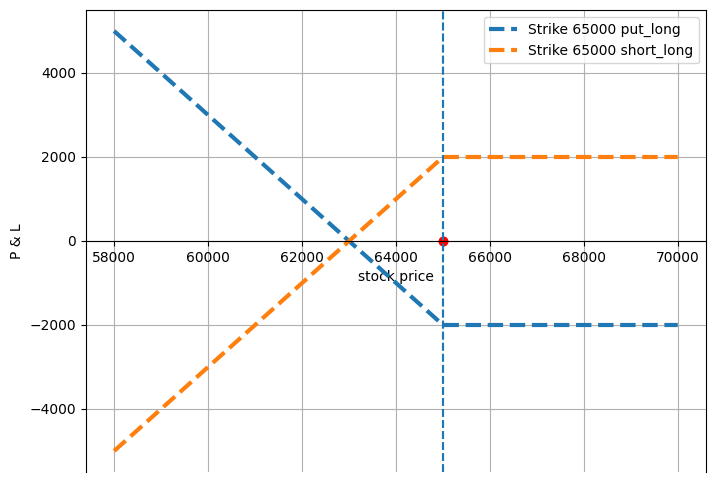

In [4]:
# 주식의 가격 범위를 설정합니다.
st = np.arange(58000, 70000, 1)
# 전체 페이오프를 계산하는 변수 초기화
total_payoff = np.zeros(st.shape)

fig, ax = plt.subplots(figsize=(8, 6))

# Long put : 풋옵션 매수
strike = 65000 
premium= 2000

payoff = long_put_payoff(st, strike, premium)
plot_spread(st, payoff, strike, ax, f'Strike {strike} put_long', '--')
total_payoff += payoff

# Short put : 풋옵션 매도
strike = 65000
premium= 2000

payoff = short_put_payoff(st, strike, premium)
plot_spread(st, payoff, strike, ax, f'Strike {strike} short_long', '--')
total_payoff += payoff